# Final Project Code

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, odeint
import rootfinder as rtf

In [ ]:
class QM(object):
    def __init__(self, Potential, E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01):
        self.Potential = Potential
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

In [ ]:
N = 1000
bounds = 10.0

def hartree_solve(charge, E):
    dr = bounds/(N-1)
    Potential = lambda r: Qscale*(-Z + np.interp(r, r_points, charge))/r
    electron = QM(Potential, E, N, bounds, 0.0, 0.0, -0.01)
    electron.scipy_trajectory()
    return electron.uv

def shoot(charge, n):
    dE = 0.3
    target = lambda E: hartree_solve(charge, E)[-1,0]
    Elow = -10.0
    Esol = None
    while True:
        Esol = rtf.bisect(target, Elow, Elow+dE)
        if (Esol):
            if (n):
                n -= 1
            else:
                break
        Elow += dE
    return Esol

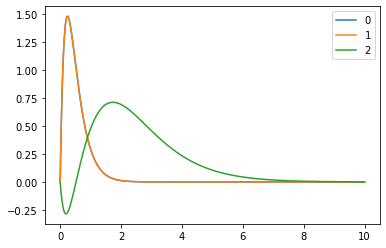

Total Energy: -385.7085028835678 eV


In [58]:
Z = 4
Ne = 3 # Number of electrons
a0 = 5.29e-11
hbar = 1.05e-34
m_e = 9.1e-31
e = 1.6e-19
Escale = hbar**2/(e*m_e*a0**2)
Qscale = e/a0 * 9e9 / Escale

r_points = np.linspace(0.0, bounds, N, endpoint=True)
E1 = [0]*Ne
E0 = [None]*Ne
u = np.zeros((Ne, N))
cumprob = np.zeros((Ne, N))

while True:
    print('Energies (eV):', np.array(E1)*Escale)
    for i in range(Ne):
        E0[i] = E1[i]
        charge = np.sum(cumprob[:i], axis=0) + np.sum(cumprob[i+1:], axis=0) # total charge density due to other electrons
        E1[i] = shoot(charge, i//2)
        u[i] = np.flip(hartree_solve(charge, E1[i])[:,0])
        if (abs(E1[i]-E0[i]) < 1e-7):
            E0[i] = E1[i]
            
    cumprob = cumulative_trapezoid(u**2, r_points, initial=0.0)
    A = cumprob[:,-1].reshape((Ne,1))
    if (E1 == E0):
        u = u/np.sqrt(A)
        plt.plot(r_points, u.T)
        plt.legend(labels=range(Ne))
        plt.show()
        break
        
    cumprob /= A

print('Total Energy:', np.sum(np.array(E1))*Escale, 'eV')

In [59]:
# Cut Code

u[0] = r_points*np.exp(-Z*r_points)
u[1] = u[0]
u[2] = r_points*(1-Z/2*r_points)*np.exp(-Z*r_points/2)
u[3] = u[2]
cumprob = cumulative_trapezoid(u**2, r_points, initial=0.0)
A = cumprob[:,-1].reshape((Ne,1))
cumprob /= A

if (i >= 2 and abs(E1[i-1]-E1[i-2]) < 1e-7):
            x = E1[i]-E1[i-1]
            y = shoot(charge, 1) - E1[i]
            d = np.sqrt(x**2+y**2)
            t = np.flip(hartree_solve(charge, E1[i]+y)[:,0])
            u[i] = x/d*u[i]/np.amax(u[i]) + y/d*t/np.amax(t)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
El.append(np.sum(np.array(E1))*Escale)
print(El)
print('Difference:', El[-1]-El[-2])